In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

In [8]:
data = pd.read_csv("./data/hw3.csv")

In [33]:
#check whether these contains nan at close and volume columns
print(data.close.isnull().unique())
print(data.volume.isnull().unique())

[False  True]
[False]


In [118]:
def calculate_volumeUSD(df):
    new_df = df.copy()
    new_df = new_df.sort_values('ts')
    new_df.close = new_df.close.fillna(method ='ffill')
    new_df.close = new_df.close.fillna(0) #prevent the value at first time tick is nan
    new_df.volumeUSD = new_df.close*new_df.volume
    return new_df

data_volumeUSD = data.groupby('chain').apply(lambda x:calculate_volumeUSD(x))

In [119]:
data_volumeUSD

ts        open        high         low  \
chain                                                                 
BTC   69    2021-12-01 00:00:00  57321.4100  57451.0500  56814.3400   
      1212  2021-12-01 01:00:00  56998.3500  57726.4500  56705.0600   
      584   2021-12-01 02:00:00  57618.5500  57620.0000  56972.9700   
      1139  2021-12-01 03:00:00  57029.7900  57396.8700         NaN   
      82    2021-12-01 04:00:00  57306.5500  57456.8200  57026.1100   
      1913  2021-12-01 05:00:00  57404.0100  57460.4200  57016.0000   
      936   2021-12-01 05:00:00  57404.0100  57460.4200  57016.0000   
      844   2021-12-01 06:00:00  57085.7500  57168.0200  56773.6600   
      1567  2021-12-01 07:00:00  56820.5500         NaN  56700.0000   
      2030  2021-12-01 08:00:00  56965.4100  57337.0000  56853.5300   
      1253  2021-12-01 09:00:00  57205.5800  57856.1700  56838.3500   
      1218  2021-12-01 10:00:00  56945.9400  57220.3900         NaN   
      1824  2021-12-01 10:00:00  56945.9400  57220.3900         NaN   
      2346  2021-12-01 11:00:00  57131.1700  57217.1100  56879.0500   
      771   2021-12-01 11:00:00  57131.1700  57217.1100  56879.0500   
      294   2021-12-01 12:00:00  57008.5600  57288.2500  56822.6500   
      1005  2021-12-01 13:00:00  57212.6000         NaN  57071.3300   
      2630  2021-12-01 14:00:00  57156.1800  57987.6700         NaN   
      1842  2021-12-01 15:00:00  57706.5700  58783.1600  57704.9800   
      1480  2021-12-01 16:00:00  58610.1900         NaN  58349.1900   
      1439  2021-12-01 16:00:00  58610.1900         NaN  58349.1900   
      628   2021-12-01 17:00:00  58664.4000         NaN  58445.5300   
      1236  2021-12-01 18:00:00  58485.8800  58631.4000  58007.2400   
      1967  2021-12-01 19:00:00  58037.5200  58148.1500  57423.5900   
      93    2021-12-01 20:00:00  57503.8900         NaN  57016.2600   
      2049  2021-12-01 21:00:00  57467.0800         NaN  56640.0000   
      2086  2021-12-01 22:00:00  56793.3300  57059.7600  56465.7500   
      21    2021-12-01 23:00:00  57026.2500  57201.4800  56656.7400   
      708   2021-12-02 00:00:00  57107.9300  57286.3800  57008.6300   
      371   2021-12-02 01:00:00  57226.5100  57239.8900  56730.0000   
...                         ...         ...         ...         ...   
USDT  450   2021-12-12 05:00:00      1.0006      1.0006      1.0005   
      2618  2021-12-12 06:00:00      1.0005         NaN      1.0005   
      1054  2021-12-12 07:00:00      1.0005      1.0006      1.0005   
      531   2021-12-12 08:00:00      1.0005      1.0006      1.0005   
      2245  2021-12-12 09:00:00      1.0006      1.0006      1.0004   
      564   2021-12-12 10:00:00      1.0004      1.0005      1.0004   
      845   2021-12-12 10:00:00      1.0004      1.0005      1.0004   
      984   2021-12-12 11:00:00      1.0004      1.0006      1.0004   
      225   2021-12-12 12:00:00      1.0005      1.0006         NaN   
      1320  2021-12-12 13:00:00      1.0006      1.0006      1.0005   
      2507  2021-12-12 14:00:00      1.0006         NaN      1.0004   
      1092  2021-12-12 15:00:00      1.0005      1.0006      1.0005   
      1186  2021-12-12 16:00:00      1.0006      1.0007      1.0005   
      1977  2021-12-12 17:00:00      1.0006      1.0007      1.0005   
      1381  2021-12-12 18:00:00      1.0005      1.0006      1.0005   
      65    2021-12-12 18:00:00      1.0005      1.0006      1.0005   
      297   2021-12-12 19:00:00      1.0005      1.0006         NaN   
      1651  2021-12-12 20:00:00      1.0005         NaN      1.0005   
      496   2021-12-12 21:00:00      1.0005      1.0006      1.0005   
      711   2021-12-12 22:00:00      1.0005      1.0006      1.0005   
      1558  2021-12-12 23:00:00      1.0006         NaN      1.0005   
      2491  2021-12-13 00:00:00      1.0006         NaN      1.0005   
      640   2021-12-13 01:00:00      1.0006      1.0006      1.0005   
      1478  2021-12-13 01:00:00      1.0006      1.00

In [88]:
#continue to clean my data
def df_cleaning(df):
    df = df.sort_values('ts')
    df = df.fillna(method='ffill')
    df = df.fillna(0) #prevent the value at first time tick is nan 
    return df

data_cleaned = data.groupby('chain').apply(lambda x:df_cleaning(x))

In [74]:
data_cleaned.columns

Index(['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD', 'token',
       'chain'],
      dtype='object')

In [75]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


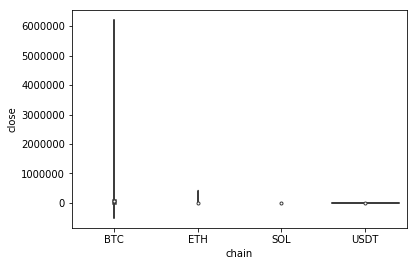

In [97]:
sns.violinplot(x='chain', y='close', data=data_cleaned)

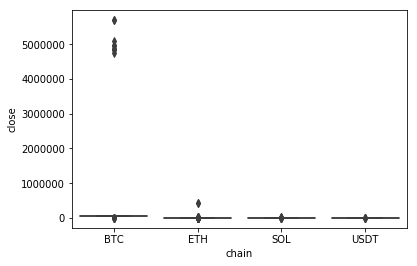

In [102]:
sns.boxplot(x='chain', y='close', data=data_cleaned)